# Ensembles: From Decision Trees to Extra Trees

## Learning Objectives

- Discuss the various types of ensembles methods
- Compare and contrast them and their advatnages/disadvantages
- Apply various ensemble methods, GridSearch, RandomizedSearch to a project dataset.
- Dealing with imbalanced classes

## Questions?
- which ones to use where?


# Ensemble Methods: Overview

> ***Ensemble Methods take advantage of the delphic technique (or "wisdom of crowds") where the average of multiple independent estimates is usually more consistently accurate than the individual estimates.***



> - Bootstrap Aggregation
    - Bagging Classifier
    - Random Forests
- Gradient Boosting:
    - Adaboost
    - Gradient Boosted Trees
- Model Stacking A.K.K. Meta-Ensembling


<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Ensemble_Methods_web.png">

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Avoid_Overfitting_web.png">--->

## Bootstrap Aggregation (Bagging)



The process for training an ensemble through bootstrap aggregation is as follows:

1. Grab a sizable sample from your dataset, with replacement 
2. Train a classifier on this sample  
3. Repeat until all classifiers have been trained on their own sample from the dataset  
4. When making a prediction, have each classifier in the ensemble make a prediction 
5. Aggregate all predictions from all classifiers into a single prediction, using the method of your choice  

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Bagging_web.png">

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-ensemble-methods-online-ds-ft-100719/master/images/new_bagging.png">

## Random Forests

- Because decision trees are greedy algorithms, every tree given same data would make same conclusions.
- In addition to bagging, random forests use **subspace sampling**
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Random_Forest_web.png">
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-random-forests-online-ds-ft-100719/master/images/new_rf-diagram.png" width=70%>




### Benefits and drawbacks

Like any algorithm, random forest comes with its own benefits and drawbacks. 

#### Benefits

* **_Strong performance_** Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well. 

* **_Interpretability_**:  each tree in the random forest is a **_Glass-Box Model_** (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall random forest is, as well! 

#### Drawbacks

* **_Computational complexity_**: On large datasets, the runtime can be quite slow compared to other algorithms.

* **_Memory usage_**: Random forests tend to have a larger memory footprint that other models. It's not uncommon to see random forests that were trained on large datasets have memory footprints in the tens, or even hundreds of MB. 


## Boosting / Gradient Boosted Trees

### Weak learners

All the models we've learned so far are **_Strong Learners_** -- models with the goal of doing as well as possible on the classification or regression task they are given. 

The term **_Weak Learner_** refers to simple models that do only slightly better than random chance. 

Boosting algorithms start with a single weak learner (usually trees), but technically, any model will do. 

Boosting works as follows:

1. Train a single weak learner  
2. Figure out which examples the weak learner got wrong  
3. Build another weak learner that focuses on the areas the first weak learner got wrong  
4. Continue this process until a predetermined stopping condition is met, such as until a set number of weak learners have been created, or the model's performance has plateaued  


### Differences between Gradient Boosting and Random Forests

- Independent vs iterative
    - in Random Forests one tree is unaffacted by another.
    - in Boosting mode each tree is iteratively created to address the prior tree's weaknesses.
    
- Weak vs Strong

    - In a random forest, each tree is a strong learner -- they would do just fine as a decision tree on their own.
    - In boosting algorithms, trees are artificially limited to a very shallow depth (usually only 1 split) 
        - to ensure that **each model is only slightly better than random chance**. 

- Aggregate Predictions:
    - in RF each tree votes
    - in boosting models trees are given weight for being good at "hard tasks"
    

### Adaboost & Gradient Boosted Trees


#### Adaboost (Adaptive Boosting)
- **_Key Takeaway:_** Adaboost creates new classifiers by continually influencing the distribution of the data sampled to train each successive learner. 
- Uses subsampling with weighted-probabilities for incorrect predictions to be included in subsequent weak learner

#### Gradient Boosted Trees
- More advanced form - uses gradient descent.
- Trains successive trees on the **residuals**

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-gradient-boosting-and-weak-learners-online-ds-ft-100719/master/images/new_gradient-boosting.png">


## Modeling Stacking / Meta-Ensembling

- Model stacking is when you use the predictions of one model as the input to another model.
<img src="https://burakhimmetoglu.files.wordpress.com/2016/12/workflow.png?w=1140">

# Predicting Prisoner Recidivism with Ensemble Methods

~~To start, we'll build a decision tree classifier, before taking a look at how we can further improve this algorithm by combining multiple decision trees. As we're feeling woodsy, import and inspect the dataset stored in `mushrooms.csv`.~~
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=30%>

- The provided dataset was too easy to predict and I was getting 100% accuracy with vanilla trees.
- Instead using partially-processed version of the Iowa Recidivism Dataset from my Mod 3 Project.
    - https://github.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119
    
- **[Non-Technical Presentation with prior results](https://github.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/blob/master/Predicting%20Recidivism%20in%20Released%20Prisoner%20in%20Iowa_v2.pdf)**
    


# Plan:

- Vanilla DecisionTreeClassifier
    - RandomizedSearchCV best-params DTC
- Bagging Classifier
- RandomForest
- ExtraTreesClassifier
    - GridSearchCV
- XGBoost

In [48]:
!pip install -U fsds_100719
from fsds_100719.imports import *

Requirement already up-to-date: fsds_100719 in /anaconda3/envs/learn-env/lib/python3.6/site-packages (0.6.6)


In [49]:
import plotly.express as px
import plotly.graph_objects as go

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics

# OBTAIN

In [51]:
# import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/jirvingphd/dsc-lp-TUNING-random-forests-and-grid-search/master/mushrooms.csv')#'mushrooms.csv')
# print(df.info())
# df.head()


In [52]:
prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"
df = pd.read_csv(prisoners,index_col=0)
df.head()

,yr_released,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [53]:
df= df.drop(columns=['yr_released'])

In [54]:
df.isna().sum().divide(len(df))*100

race_ethnicity     0.115296
age_released       0.011530
crime_class        0.000000
crime_type         0.000000
crime_subtype      0.000000
release_type       6.771714
super_dist        36.821676
recidivist         0.000000
target_pop         0.000000
sex                0.011530
dtype: float64

In [55]:
df['race_ethnicity'].value_counts()

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
American Indian or Alaska Native - Hispanic           20
White -                                               12
Asian or Pacific Islander - Hispanic                   5
N/A -                                                  5
Black -                                                2
Name: race_ethnicity, dtype: int64

In [56]:
df['super_dist'].value_counts(dropna=False)

NaN                   9581
5JD                   4982
1JD                   2787
2JD                   1988
8JD                   1556
7JD                   1514
3JD                   1188
6JD                   1098
4JD                    667
ISC                    350
Interstate Compact     309
Name: super_dist, dtype: int64

In [57]:
## Check for and address null values
drop_cols = ['race_ethnicity','age_released','sex']
df = df.dropna(subset=drop_cols)
df.isna().sum()

race_ethnicity       0
age_released         0
crime_class          0
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9549
recidivist           0
target_pop           0
sex                  0
dtype: int64

In [58]:
df =  df.fillna('missing')
df.isna().sum()

race_ethnicity    0
age_released      0
crime_class       0
crime_type        0
crime_subtype     0
release_type      0
super_dist        0
recidivist        0
target_pop        0
sex               0
dtype: int64

In [59]:
## Inspect Value Counts for target
df['recidivist'].value_counts(normalize=True)

No     0.665948
Yes    0.334052
Name: recidivist, dtype: float64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25987 entries, 0 to 26019
Data columns (total 10 columns):
race_ethnicity    25987 non-null object
age_released      25987 non-null object
crime_class       25987 non-null object
crime_type        25987 non-null object
crime_subtype     25987 non-null object
release_type      25987 non-null object
super_dist        25987 non-null object
recidivist        25987 non-null object
target_pop        25987 non-null object
sex               25987 non-null object
dtypes: object(10)
memory usage: 2.2+ MB


In [61]:
df['age_released'].value_counts()

25-34           9543
35-44           6217
Under 25        4585
45-54           4340
55 and Older    1302
Name: age_released, dtype: int64

In [62]:
age_map = {'25-34':30, '35-44':40,
           'Under 25': 20,
           '45-54':50,
           '55 and Older': 61}

df['age_released'] = df['age_released'].map(age_map)
df['age_released']

0        30
1        30
2        40
3        30
4        40
         ..
26015    20
26016    40
26017    30
26018    30
26019    40
Name: age_released, Length: 25987, dtype: int64

In [63]:
## Encode categorical features
df = pd.get_dummies(df, drop_first=True,
                    columns=df.drop(columns='age_released').columns)
df

,age_released,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black -,race_ethnicity_Black - Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_N/A -,race_ethnicity_White -,race_ethnicity_White - Hispanic,...,super_dist_5JD,super_dist_6JD,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,recidivist_Yes,target_pop_Yes,sex_Male
0,30,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,1
1,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,40,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
3,30,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,40,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,20,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
26016,40,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26017,30,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26018,30,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [67]:
y = df['recidivist_Yes']
X = df.drop(columns=['recidivist_Yes'])

## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

## Check target class counts
print(pd.Series(y_train).value_counts(normalize=True) )
pd.Series(y_test).value_counts(normalize=True)


0    0.663879
1    0.336121
Name: recidivist_Yes, dtype: float64


0    0.672156
1    0.327844
Name: recidivist_Yes, dtype: float64

## ADDRESSING IMBALANCED CLASSES

- Downsample/undersampling to match minority class.
- Synthetic Minority Over Sampling Technique (SMOTE)
-  Adaptive Synthetic (ADASYN)
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Downsampling_web.png" width=10%>

In [68]:
from imblearn.over_sampling import ADASYN,SMOTE

## Use SMOTE to resample X_train, y_train
smote=SMOTE()

X_train, y_train = smote.fit_sample(X_train, y_train)
print(pd.Series(y_train).value_counts() )
pd.Series(y_test).value_counts()

Using TensorFlow backend.


1    12939
0    12939
Name: recidivist_Yes, dtype: int64


0    4367
1    2130
Name: recidivist_Yes, dtype: int64

In [ ]:
# ## Undersampling to match smallest class
# df_yes = df.groupby('recidivist').get_group('Yes')
# df_no = df.groupby('recidivist').get_group('No')

# sample_size = min(len(df_yes),len(df_no))
# sample_size

# sample_state = 123
# np.random.seed(sample_state)

# df_samp = pd.concat([df_yes.sample(sample_size,random_state=sample_state),
#                 df_no.sample(sample_size,random_state=sample_state)],axis=0)
# df_samp['recidivist'].value_counts()

In [ ]:
# y_resampled = df_ohe['recidivist_Yes']
# X_resampled = df_ohe.drop(columns=['recidivist_Yes'])
# # y = df_le['recidivist']
# # X = df_le.drop(columns=['recidivist'])

# X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled)
# X_train.shape, y_test.shape


## Defining the Problem & Fitting a Decision Tree

Now, import the necessary packages and fit a decision tree to predict whether or not a mushroom is poisonous (this is stored under the 'class' feature as 'e' for edible, or 'p' for poisonous.

### Functions from Prior Classes

In [69]:
def plot_confusion_matrix(cm, classes=None, normalize=False,cmap=None,
                          title='Confusion Matrix',title_font={'size':14},
                          annot_kws={'size':10,'weight':50}, 
                          axislabel_font={'size':14,'weight':70}, 
                          tick_font={'size':12,'weight':50},x_rot =45, y_rot=0,
                         fig_kws={'figsize':(5,5)}):
    """ Plots a confusion matrix of either a pre-calculated cm or a tuple of (y_true,y_pred) as cm.
    
    Args:
        cm (array or tuple): Either a confusion amtrix from sklearn or (y_true,y_pred) tuple
        classes (list, optional): Names of classes to use. Defaults to integers 0 to len(cm).
        normalize (bool, optional): Annotate class-percentages instead of counts. Defaults to False.
        cmap (cmap, optional): colormap to use Defaults to plt.get_cmap("Blues").
        title (str, optional): Plot title. Defaults to 'Confusion Matrix'.
        title_font (dict, optional): fontdict for set_title. Defaults to {'size':14}.
        annot_kws (dict, optional): kws for ax.Text annotations. Defaults to {'size':10,'weight':50}.
        axislabel_font (dict, optional): fontdict for ylabel,xlabel. Defaults to {'size':14,'weight':70}.
        tick_font (dict, optional): kws for plt.xticks/yticks. Defaults to {'size':12,'weight':50}.
        x_rot (int, optional): Rotation of x-axis tick labels. Defaults to 45.
        y_rot (int, optional): Rotation of y-axis tick labels.Defaults to 0.
        fig_kws (dict, optional): kws for plt.subplots. Defaults to {}.
    
    Returns:
        fig,ax: matplotlib Figure & Axes
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import sklearn.metrics as metrics
    
    ## If (y_true,y_pred) passed as cm
    if isinstance(cm, tuple):
        cm = metrics.confusion_matrix(*cm)
        
    ## if normalize:  normalize counts to class-accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        

    
    ## Setting & updating default kws
    subplots_kws = {}
    subplots_kws.update(fig_kws)
    
    ## Annotation kws
    text_kws = dict(horizontalalignment="center")
    text_kws.update(annot_kws)    
    
    ## Axis Labels
    axlabel_kws = dict(size=12, weight='bold')
    axlabel_kws.update(axislabel_font)
    
    ## Tick Labels
    ticklabel_kws = dict(size=10)
    ticklabel_kws.update(tick_font)
    

    ## Define classes if not 
    if classes is None:
        classes = list(range(len(cm)))
        
    ## Default cmap
    if cmap is None:
        cmap = plt.get_cmap("Blues")



    ## Create fig,ax and plot iamge
    fig, ax = plt.subplots(**subplots_kws)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title,fontdict=title_font)

    
    ## Create Ticks
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=x_rot,**ticklabel_kws)
    plt.yticks(tick_marks, classes, rotation=y_rot,**ticklabel_kws)

    ## Set annotation fmt and color threshold
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    ## Add cm labels
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # text_kws.update(color=color)
        ax.text(j, i, format(cm[i, j], fmt),color="white" if cm[i, j] > thresh else "black",fontdict=text_kws)
                
    ## Set axis labels
    ax.set_ylabel('True Label',fontdict=axislabel_font)
    ax.set_xlabel('Predicted Label',fontdict=axislabel_font)
     
    ## Add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    fig.colorbar(im,cax=cax)     

#     plt.tight_layout()

    return fig,ax



def plot_auc_roc_curve(y_test, y_test_pred,figsize=(8,4)):
    """ Takes y_test and y_test_pred from a ML model and uses sklearn roc_curve to plot the AUC-ROC curve."""
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    import matplotlib.pyplot as plt
    
    assert y_test.shape==y_test_pred.shape
    auc = roc_auc_score(y_test, y_test_pred)#[:,1])

    FPr, TPr, _  = roc_curve(y_test, y_test_pred)#[:,1])
#     auc()
    fig,ax=plt.subplots(figsize=figsize)
    ax.plot(FPr, TPr,label=f"AUC for Classifier:\n{round(auc,2)}" )

    ax.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc="lower right")
#     plt.show()
    return fig, ax

## Vanilla DT

In [70]:
## Fit a vanilla DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

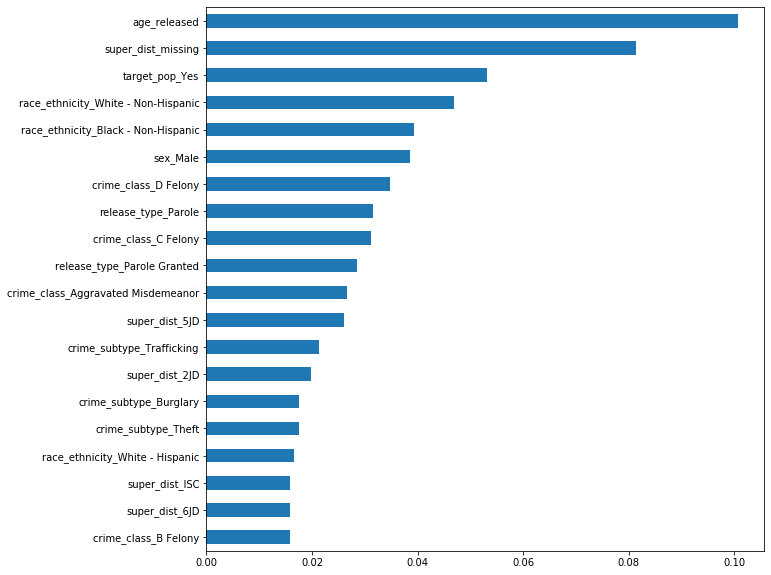

In [79]:
def plot_importance(tree, top_n=20,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance
plot_importance(tree);

In [80]:
# ## Plot feature importance 
# def plot_importance():
#     pass

(<Figure size 576x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a224498d0>)

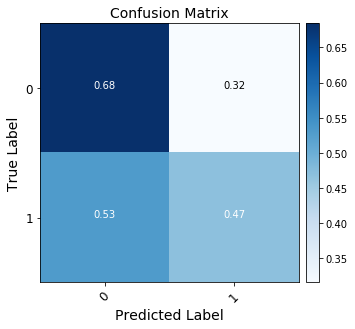

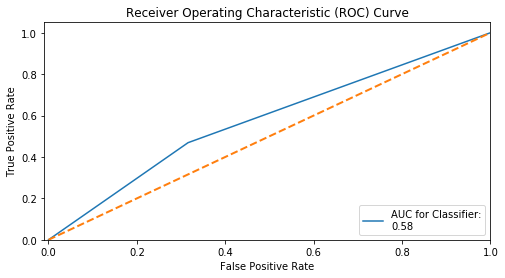

In [84]:
## Get Precitions
y_hat_test = tree.predict(X_test)

plot_confusion_matrix((y_test,y_hat_test),normalize=True)
plot_auc_roc_curve(y_test,y_hat_test)

In [91]:
## Write a fucntion to evalute the model
def evaluate_model(y_test, y_hat_test,tree):
    print(metrics.classification_report(y_test, y_hat_test))
    try: 
        df_important = plot_importance(tree)
    except:
        df_important = None
    
    fig, ax = plot_confusion_matrix((y_test,y_hat_test),normalize=True)
    fig2, ax2 = plot_auc_roc_curve(y_test,y_hat_test)
#     return df_important

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      4367
           1       0.42      0.47      0.44      2130

    accuracy                           0.61      6497
   macro avg       0.57      0.58      0.57      6497
weighted avg       0.63      0.61      0.62      6497



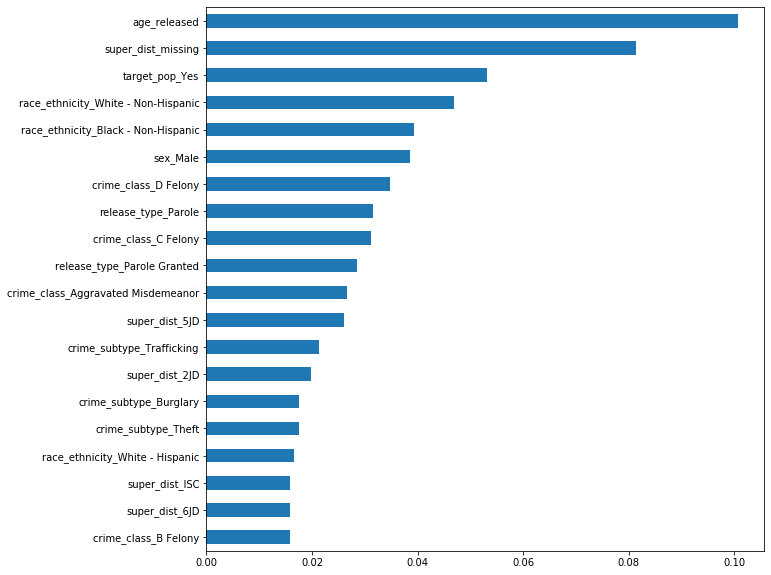

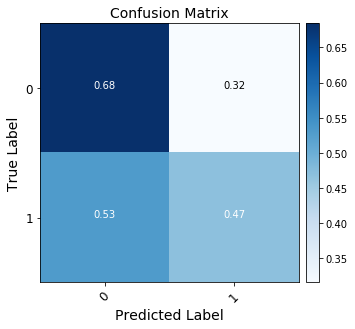

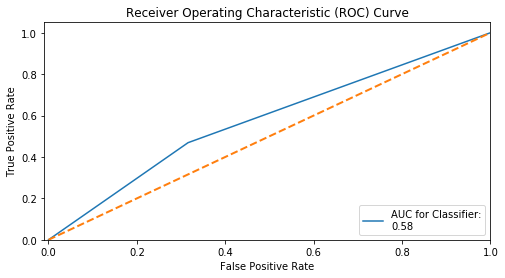

In [92]:
## Evaluate the model
evaluate_model(y_test,y_hat_test,tree)

## You can also visualize your Decision Trees

> Note: This requires installing graphviz which can be a painful installation.

In [93]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,class_names=['0','1'],export_graphviz_kws={}):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    from graphviz import Source
    from IPython.display import display
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None, rotate=False, filled = True)
    tree_viz_kws.update(export_graphviz_kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    graph = Source(export_graphviz(tree,feature_names=feature_names, class_names=class_names,**tree_viz_kws))
    display(SVG(graph.pipe(format='svg')))

In [96]:
# visualize_tree(tree,X.columns)

## GridSearchCV with DecisionTreeClassifier

In [97]:
class Timer():
    def __init__(self, start=True,time_fmt='%m/%d/%y - %T'):
        import tzlocal
        import datetime as dt
        
        self.tz = tzlocal.get_localzone()
        self.fmt= time_fmt
        self._created = dt.datetime.now(tz=self.tz)
        
        if start:
            self.start()
            
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(tz=self.tz)

        
    def start(self,verbose=True):
        self._laps_completed = 0
        self.start = self.get_time()
        if verbose: 
            print(f'[i] Timer started at {self.start.strftime(self.fmt)}')
    
    def stop(self, verbose=True):
        self._laps_completed += 1
        self.end = self.get_time()
        self.elapsed = self.end -  self.start
        if verbose: 
            print(f'[i] Timer stopped at {self.end.strftime(self.fmt)}')
            print(f'  - Total Time: {self.elapsed}')

In [99]:
X_train.shape

(25878, 77)

In [102]:
## Set up param grid
grid = {'max_depth': [3,5,10,15],
     'criterion': ['gini','entropy'],
     'min_samples_split':[2,5,10],
     'min_samples_leaf':[1,2,3,5,10],
       'max_features': [3,5,10,30,77]}#10,20,50,len(X.columns)]}


## Instantiate classifier
dt_clf = DecisionTreeClassifier()


## Instantiate GridSearchCV
gridsearch = GridSearchCV(dt_clf, param_grid=grid,cv=5)

## Start timer and fit search
timer = Timer()

tree_cv = gridsearch.fit(X_train, y_train)
timer.stop()
## Stop time and print best params
print(tree_cv.best_params_)

[i] Timer started at 01/21/20 - 13:18:24
[i] Timer stopped at 01/21/20 - 13:20:27
  - Total Time: 0:02:03.758873
{'criterion': 'gini', 'max_depth': 15, 'max_features': 77, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [103]:
## Create a tree with the gridsearch's best params
tree = DecisionTreeClassifier(**tree_cv.best_params_)
tree.fit(X_train,y_train)

## Get predictions for train and test
y_hat_test = tree.predict(X_test)
y_hat_train = tree.predict(X_train)


## Print classification report for train and test
print(f"[i] Training Data:\n{metrics.classification_report(y_train,y_hat_train)}",end='\n\n')
print(f"[i] Test Data:\n{metrics.classification_report(y_test,y_hat_test)}")
# print(metrics.confusion_matrix(y_test,y_hat_test))

## Evaluate Model using function

[i] Training Data:
              precision    recall  f1-score   support

           0       0.78      0.59      0.67     12939
           1       0.67      0.83      0.74     12939

    accuracy                           0.71     25878
   macro avg       0.73      0.71      0.71     25878
weighted avg       0.73      0.71      0.71     25878


[i] Test Data:
              precision    recall  f1-score   support

           0       0.78      0.55      0.64      4367
           1       0.42      0.67      0.52      2130

    accuracy                           0.59      6497
   macro avg       0.60      0.61      0.58      6497
weighted avg       0.66      0.59      0.60      6497



              precision    recall  f1-score   support

           0       0.78      0.55      0.64      4367
           1       0.42      0.67      0.52      2130

    accuracy                           0.59      6497
   macro avg       0.60      0.61      0.58      6497
weighted avg       0.66      0.59      0.60      6497



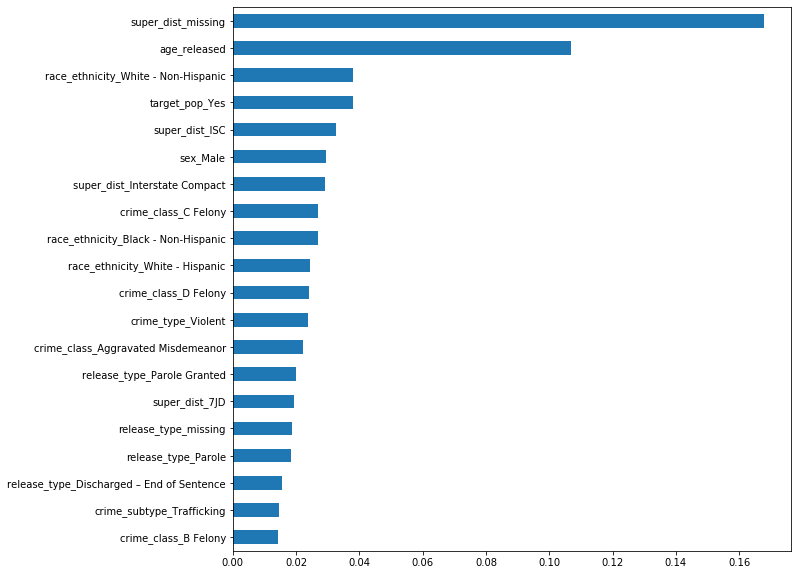

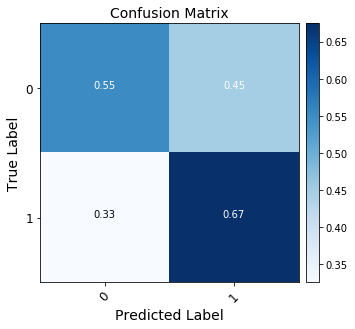

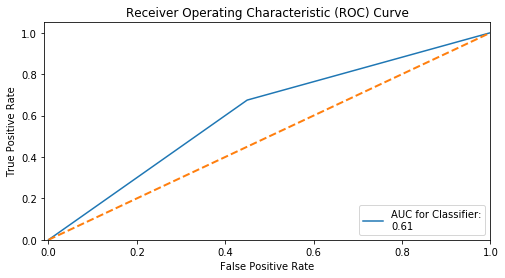

In [105]:
# visualize_tree(tree)
evaluate_model(y_test,y_hat_test,tree)

In [ ]:
# # Create the pipeline
# pipetree = Pipeline([('enc',LabelEncoder()),
#                      ('ohe',OneHotEncoder()),
#                     ('dt',DecisionTreeClassifier())])

# # pipe = Pipeline([('scl', MinMaxScaler()),
# #                 ('pca', PCA(n_components=10)),
# #                 ('svm', svm.SVC(random_state=123))])

# # Create the grid parameter
# grid = {'dt__max_depth': [3,5,10],
#      'dt__criterion': ['gini','entropy'],
#      'dt__min_samples_split':[2,5,10],
#      'dt__min_samples_leaf':[1,2,3]}
# @timeit
# def timed_search(pipe=pipetree, grid=grid):
#     randomsearch = RandomizedSearchCV(estimator=pipe,param_distributions=grid,verbose=1)

#     randomsearch.fit(X_train, y_train)
#     return randomsearch
# # # Create the grid parameter
# # grid = [{'svm__kernel': ['poly', 'sigmoid'],
# #          'svm__C': [0.01, 1, 100],
# #          'svm__degree0': [2,3,4,5],
# #          'svm__gamma': [0.001, 0.01]}]

# # # Create the grid, with "pipe" as the estimator
# # gridsearch = GridSearchCV(estimator=pipe,
# #                   param_grid=grid,
# #                   scoring='accuracy',
# #                   cv=3)

# # Fit using grid search
# # gridsearch.fit(X_train, y_train)

A single decision tree will often overfit your training data. There are steps one can take to help with this, like limiting the "depth" of the nodes. But it's often better to do something else: Plant another tree!

Of course, if a second tree is going to be of any value, it has to be *different from* the first. Here's a good algorithm for achieving that:

## Fitting a Set of Bagged Decision Trees

### Bagging Algorithm

Take a sample of your X_train and fit a decision tree to it. <br/>
Replace the first batch of data and repeat. <br/>
When you've got as many trees as you like, make use of all your individual trees' predictions to come up with some holistic prediction. (Most obviously, we could take the average of our predictions, but there are other methods we might try.)

<br/>

Because we're resampling our data with replacement, we're *bootstrapping*. <br/>
Because we're making use of our many samples' predictions, we're *aggregating*. <br/>
Because we're bootstrapping and aggregating all in the same algorithm, we're *bagging*.

In [106]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [107]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(X_train, y_train)
print(bag.score(X_test, y_test))


0.6178236108973373


              precision    recall  f1-score   support

           0       0.74      0.67      0.70      4367
           1       0.43      0.51      0.47      2130

    accuracy                           0.62      6497
   macro avg       0.58      0.59      0.58      6497
weighted avg       0.64      0.62      0.63      6497



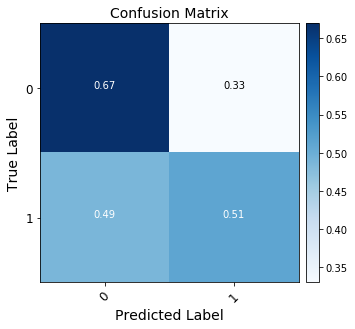

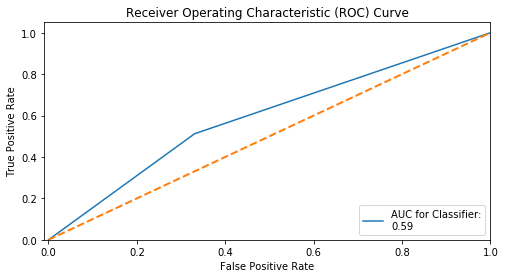

In [108]:
y_hat_test = bag.predict(X_test)

evaluate_model(y_test,y_hat_test,bag)

In [ ]:
## Get predictions and evaluate model


That's a significant improvement in accuracy! Let's see if we can do even better.

## Fitting a Random Forest

### Random Forest Algorithm

Let's add an extra layer of randomization: Instead of using *all* the features of my model to optimize a branch at each node, I'll just choose a subset of my features.

In [109]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))


0.6158226873941819


              precision    recall  f1-score   support

           0       0.74      0.67      0.70      4367
           1       0.43      0.51      0.46      2130

    accuracy                           0.62      6497
   macro avg       0.58      0.59      0.58      6497
weighted avg       0.63      0.62      0.62      6497



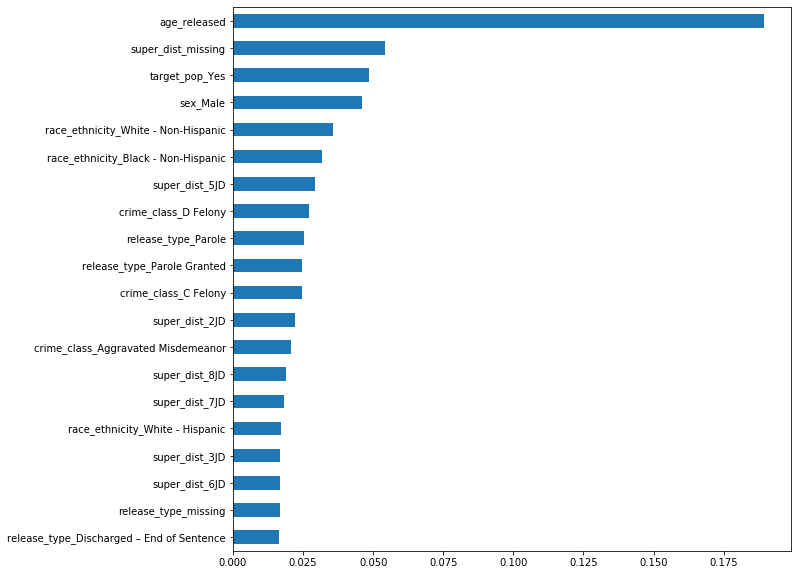

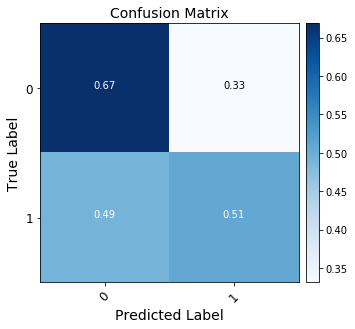

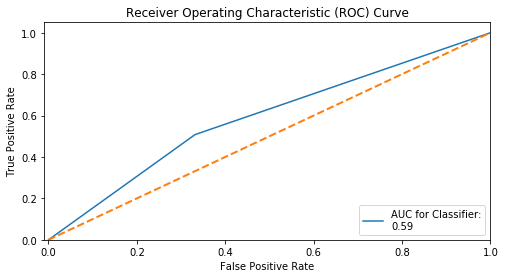

In [110]:
y_hat_test = rf.predict(X_test)
evaluate_model(y_test,y_hat_test,rf)

## Fitting a Stand of Extremely Randomized Trees

### Extra Trees Algorithm

Sometimes we might want even one more bit of randomization. Instead of always choosing the *optimal* branching path, we might just choose a branching path at random. If we're doing that, then we've got extremely randomized trees.

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=100)
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [112]:
et.score(X_test, y_test)

0.6233646298291519

## GridSearch ExtraTrees

In [113]:
param_grid = {
    'n_estimators': [30, 100, 300],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6]
}

In [117]:
rs =RandomizedSearchCV(et, param_grid,10)
# gs = GridSearchCV(et, param_grid, cv=5)

In [118]:
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                     

In [119]:
rs.score(X_test, y_test)

0.6250577189472064

In [120]:
rs.best_params_

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2}

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      4367
           1       0.44      0.55      0.49      2130

    accuracy                           0.63      6497
   macro avg       0.60      0.61      0.60      6497
weighted avg       0.65      0.63      0.63      6497



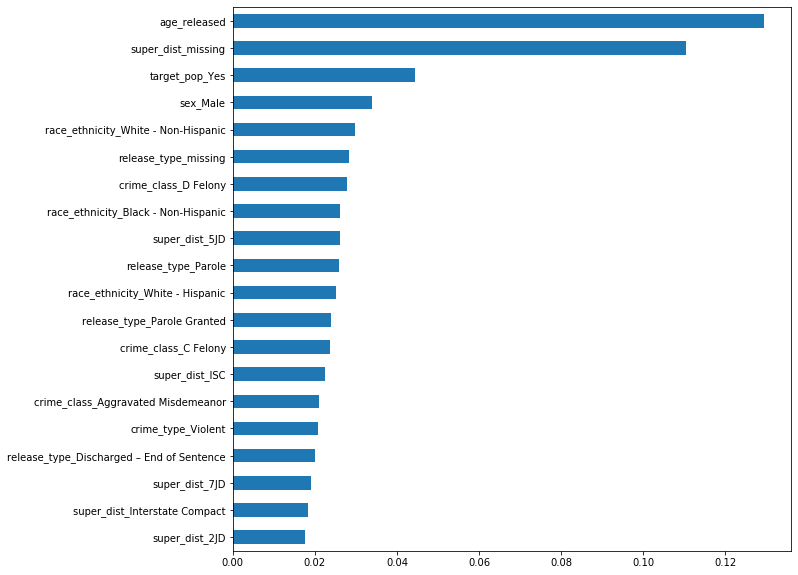

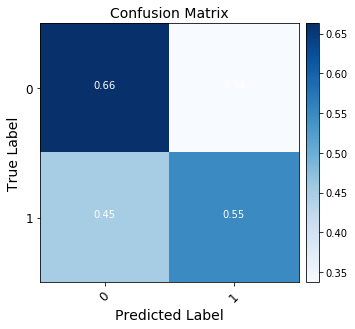

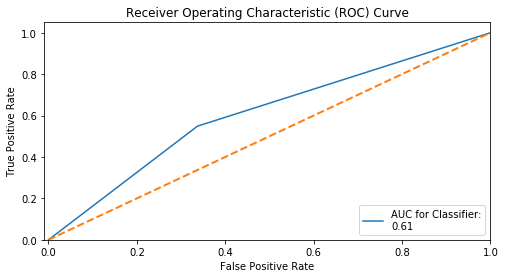

In [121]:
et = ExtraTreesClassifier(**rs.best_params_)
et.fit(X_train,y_train)
y_hat_test = et.predict(X_test)

evaluate_model(y_test,y_hat_test,et)

## XGBoost

0.5641065106972449
              precision    recall  f1-score   support

           0       0.79      0.47      0.59      4367
           1       0.41      0.75      0.53      2130

    accuracy                           0.56      6497
   macro avg       0.60      0.61      0.56      6497
weighted avg       0.67      0.56      0.57      6497



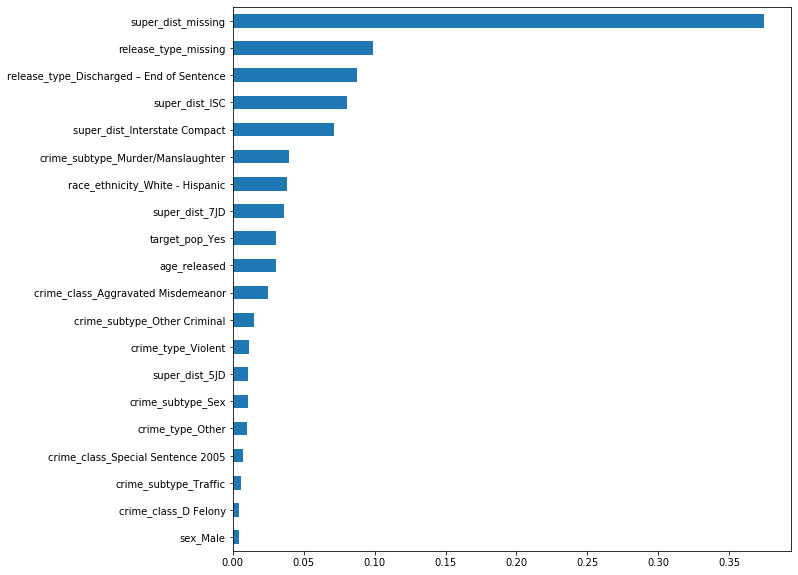

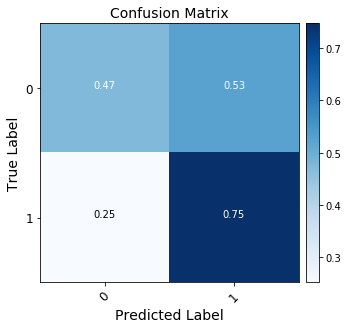

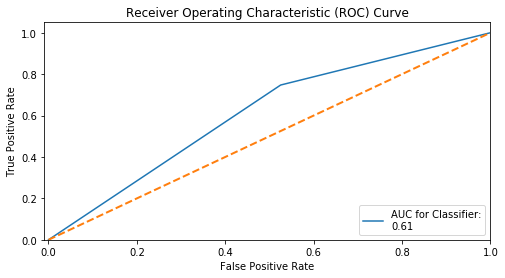

In [122]:
from xgboost import XGBClassifier,XGBRFClassifier

xgb_rf = XGBRFClassifier()
xgb_rf.fit(X_train, y_train)
print(xgb_rf.score(X_test,y_test))

y_hat_test = xgb_rf.predict(X_test)

evaluate_model(y_test,y_hat_test,xgb_rf)

In [123]:
xgbrf_grid = {'colsample_bynode': 0.8, 'learning_rate': 1,
              'max_depth': 5, 'num_parallel_tree': 100, 
              'objective': 'binary:logistic', 'subsample': 0.8}

xrf_clf = XGBRFClassifier(**xgbrf_grid)

In [124]:
xrf_clf.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.8, verbosity=1)

              precision    recall  f1-score   support

           0       0.80      0.50      0.62      4367
           1       0.42      0.73      0.53      2130

    accuracy                           0.58      6497
   macro avg       0.61      0.62      0.58      6497
weighted avg       0.67      0.58      0.59      6497



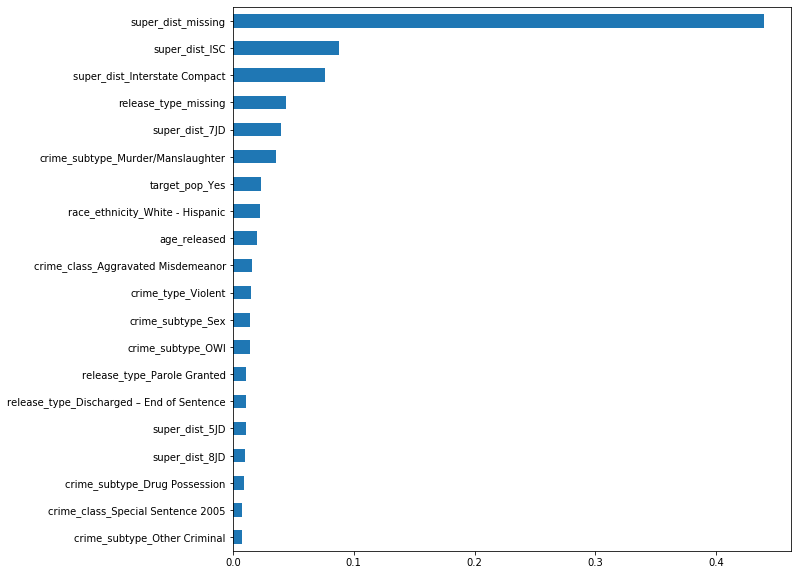

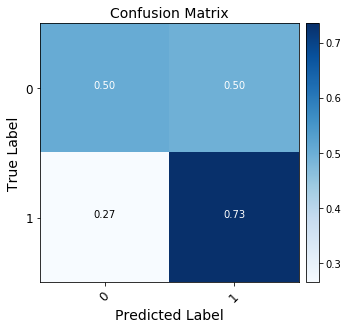

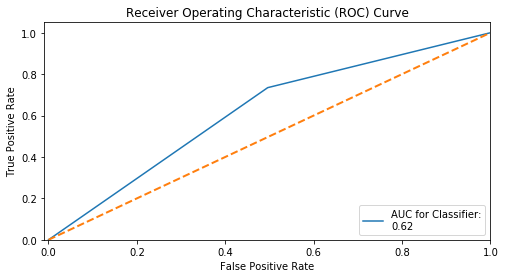

In [125]:
y_hat_test = xrf_clf.predict(X_test)

evaluate_model(y_test,y_hat_test,xrf_clf)